In [46]:
import os
import json
from matplotlib import pyplot as plt
import numpy as np

ALG = 'mappo'
ENV = 'lbforaging:Foraging-8x8-2p-3f-v2'
ENVS = ['lbforaging:Foraging-8x8-2p-3f-v2', 'pressureplate:pressureplate-linear-4p-v0', 'rware:rware-tiny-2ag-v1']
RUN_NO = 1

In [47]:
def get_json(alg: str = ALG, env: str = ENV, run: int = RUN_NO) -> dict:
    file = os.path.join(alg, env, str(run), 'info.json')
    with open(file) as f:
        data = json.load(f)
    return data

In [48]:
def get_return(alg: str = ALG, env: str = ENV, run: int = RUN_NO) -> list[float]:
    d = get_json(alg, env, 'final')
    test_return = d['test_return_mean']
    # numpy values
    if type(test_return[0]) == dict:
        test_return = [x['value'] for x in test_return]
    return test_return

In [49]:
def plot_env_algos(tests):

    vals = [get_return(a, e, i) for a, e, i in tests]
    t = list(zip(*vals))
    m_t = [np.mean(x) for x in t]
    m_i = np.argmax(m_t)

    for alg, e, r in tests:
        test_return = get_return(alg, e, r)[:m_i]
        plt.plot(test_return, label=alg)
        curr_e = e
    plt.title(curr_e)
    plt.xlabel("Timesteps (× 50000)")
    plt.ylabel("test_return_mean")
    plt.legend()
    plt.show()

In [50]:
TESTS = (
    # ('ippo', 'rware:rware-tiny-2ag-v1', 3), 
    ('maa2c', 'rware:rware-tiny-2ag-v1', 1),
    ('mappo', 'rware:rware-tiny-2ag-v1', 'final'),
    ('saf', 'rware:rware-tiny-2ag-v1', 'final'),
    ('qmix', 'rware:rware-tiny-2ag-v1', 3), 
    ('maa2c', 'rware:rware-tiny-4ag-v1', 1),
    ('mappo', 'rware:rware-tiny-4ag-v1', 'final'),
    ('saf', 'rware:rware-tiny-4ag-v1', 'final'),
    ('mappo', 'lbforaging:Foraging-8x8-2p-3f-v2', 2), 
    ('maa2c', 'lbforaging:Foraging-8x8-2p-3f-v2', 3),
    ('qmix', 'lbforaging:Foraging-8x8-2p-3f-v2', 1),
    ('saf', 'lbforaging:Foraging-8x8-2p-3f-v2', 'final'),
    ('mappo', 'lbforaging:Foraging-15x15-4p-5f-v2', 'final'), 
    ('saf', 'lbforaging:Foraging-15x15-4p-5f-v2', 'final'),
    ('qmix', 'lbforaging:Foraging-15x15-4p-5f-v2', 'final'), 
    ('maa2c', 'lbforaging:Foraging-15x15-4p-5f-v2', 'final'),
    ('mappo', 'pressureplate:pressureplate-linear-4p-v0', 'final'), 
    ('maa2c', 'pressureplate:pressureplate-linear-4p-v0', 2), 
    ('qmix', 'pressureplate:pressureplate-linear-4p-v0', 1),
    ('saf', 'pressureplate:pressureplate-linear-4p-v0', 'final'),
)

N_RWARE = 3
N_RWARE4 = N_RWARE+3
N_LBF8 = N_RWARE4+4
N_LBF15 = N_LBF8+4
N_PP = N_LBF15+4

TESTS_1 = TESTS[:N_RWARE]
TESTS_2 = TESTS[N_RWARE:N_RWARE4]
TESTS_3 = TESTS[N_RWARE4:N_LBF8]
TESTS_4 = TESTS[N_LBF8:N_LBF15]
TESTS_4 = TESTS[N_LBF15:]

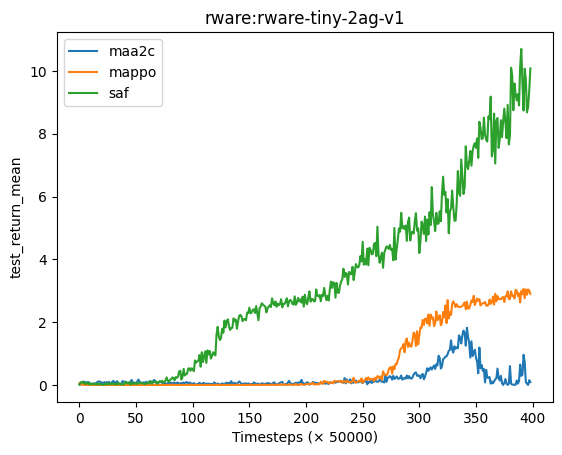

In [51]:
plot_env_algos(TESTS_1)


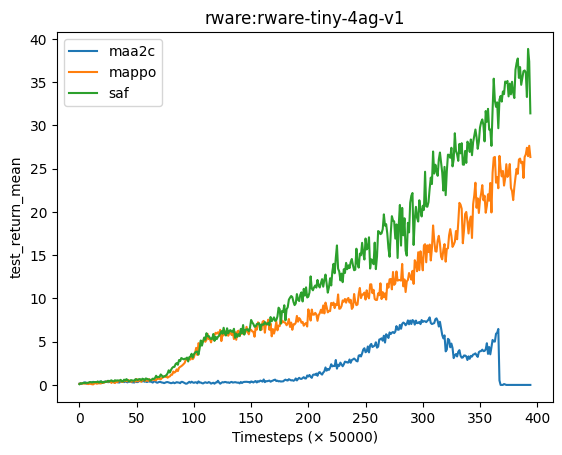

In [52]:
plot_env_algos(TESTS_2)

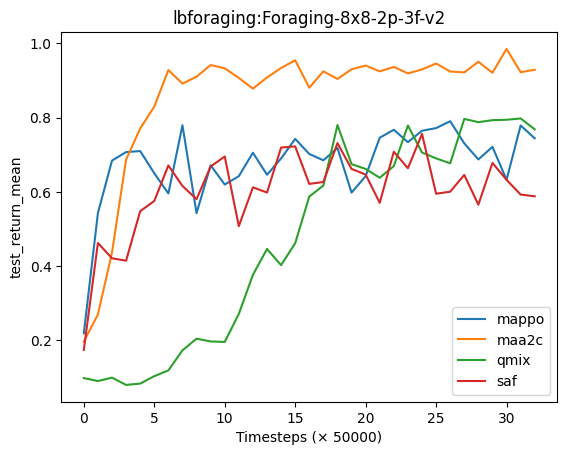

In [53]:
plot_env_algos(TESTS_3)

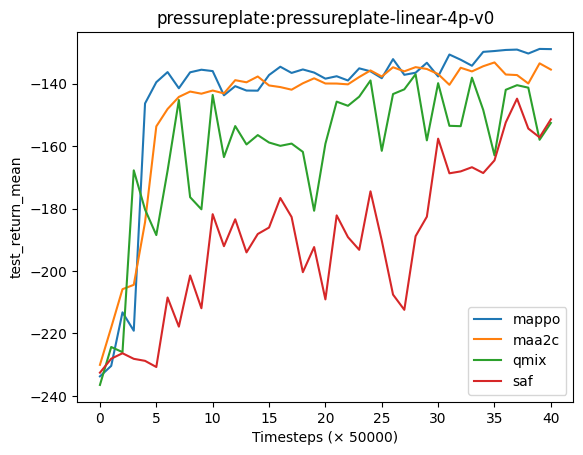

In [54]:
plot_env_algos(TESTS_4)

In [55]:
plot_env_algos(TESTS_5)

NameError: name 'TESTS_5' is not defined

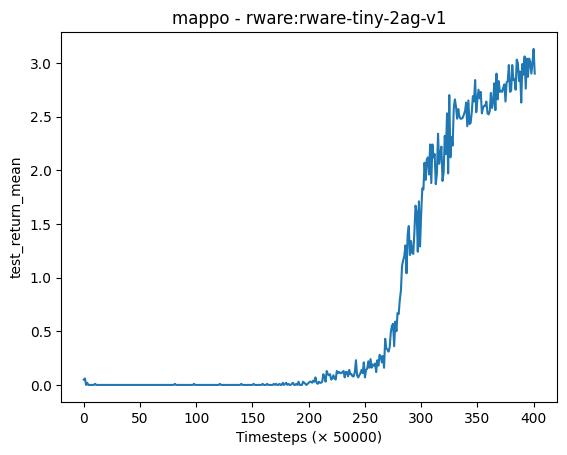

In [ ]:
alg = 'mappo'
e = 'rware:rware-tiny-2ag-v1'
for i in range(2,3):
    try:
        test_return = get_return(alg, e, i)
    except KeyError:
        continue
    plt.plot(test_return)
    plt.title(' - '.join((alg, e)))
    plt.xlabel("Timesteps (× 50000)")
    plt.ylabel("test_return_mean")
    plt.show()

In [ ]:
d = get_json(alg, e, 'error')
d.keys()

dict_keys(['advantage_mean', 'advantage_mean_T', 'agent_grad_norm', 'agent_grad_norm_T', 'critic_grad_norm', 'critic_grad_norm_T', 'critic_loss', 'critic_loss_T', 'ep_length_mean', 'ep_length_mean_T', 'episode', 'episode_T', 'pg_loss', 'pg_loss_T', 'pi_max', 'pi_max_T', 'q_taken_mean', 'q_taken_mean_T', 'return_mean', 'return_mean_T', 'return_std', 'return_std_T', 'target_mean', 'target_mean_T', 'td_error_abs', 'td_error_abs_T', 'test_ep_length_mean', 'test_ep_length_mean_T', 'test_return_mean', 'test_return_mean_T', 'test_return_std', 'test_return_std_T'])

In [ ]:
type(d['advantage_mean'][-1])

float

0.0864971435546875 1
-0.12461243896484375 0


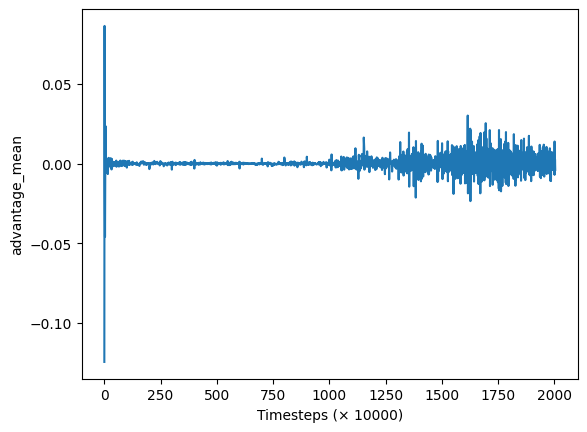

0.026917828246951103 1631
5.6185457651736215e-05 969


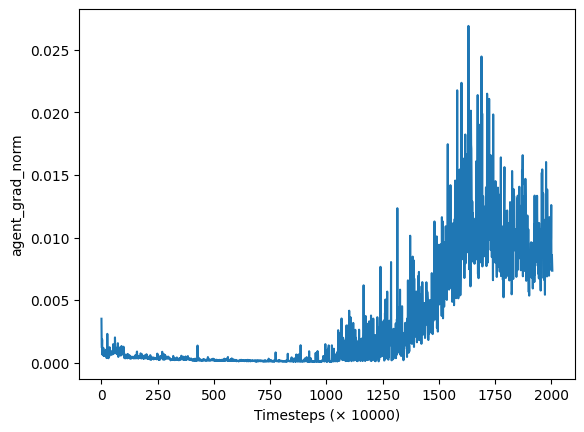

0.699233889579773 0
0.0001288809289690107 921


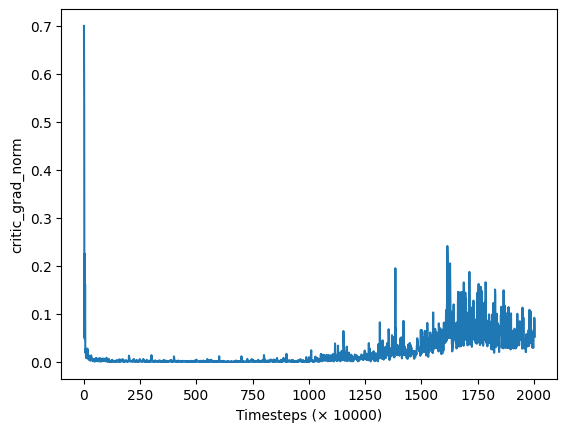

0.017185144126415253 0
8.451378562313039e-06 1001


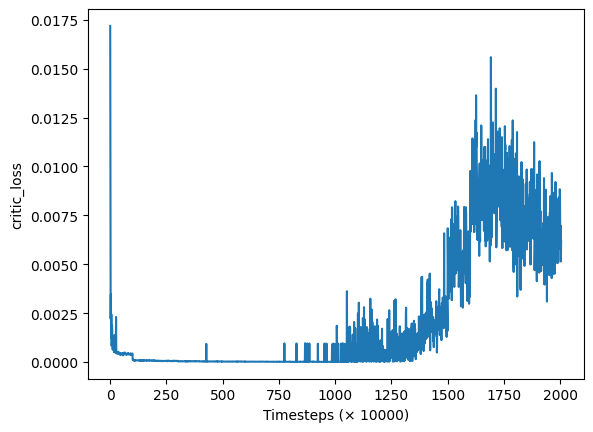

500.0 0
500.0 0


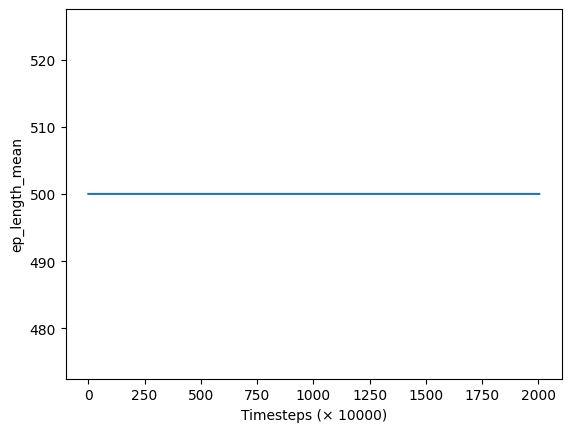

40000 399
100 0


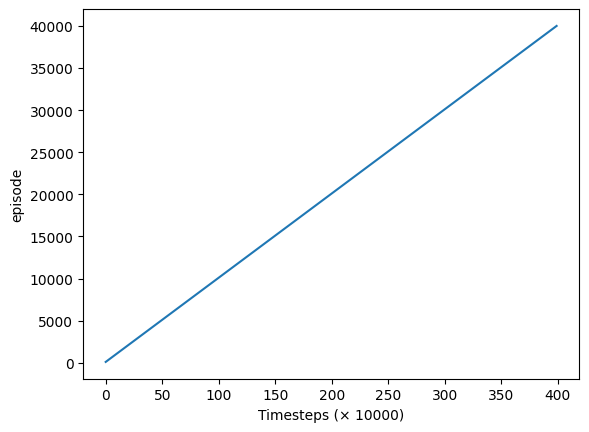

0.10842215269804001 0
-0.10258093476295471 1


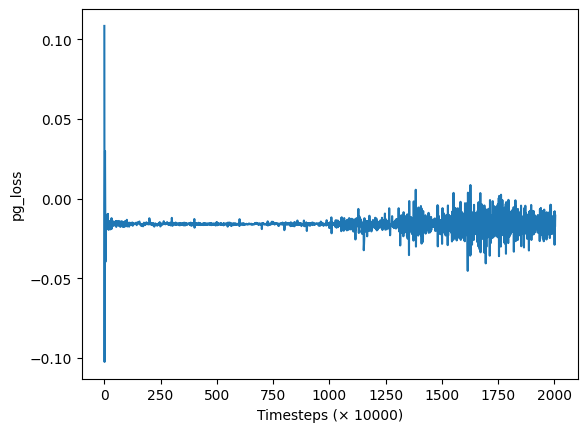

0.374402197265625 1626
0.2089510498046875 4


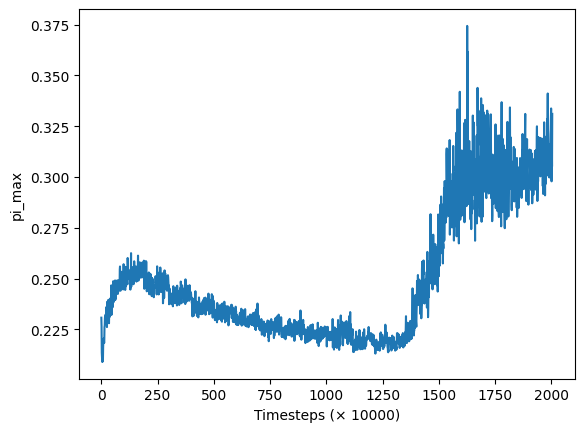

0.211430712890625 1721
-0.27924658203125 1


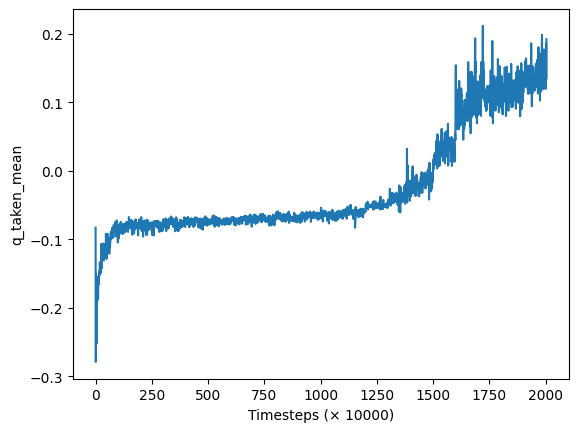

3.45 1994
0.0 0


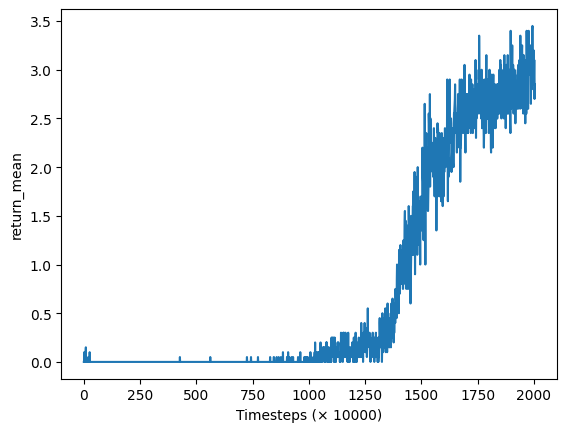

1.4448183276799889 1544
0.0 0


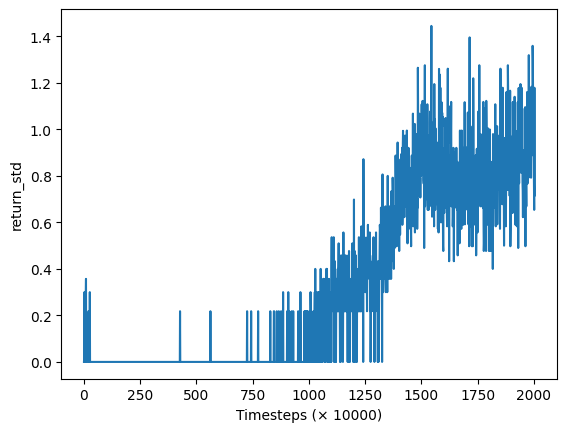

0.2074876220703125 1721
-0.22848408203125 5


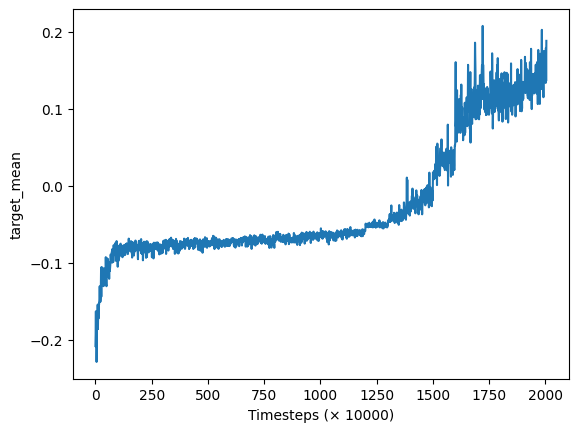

0.12462767333984374 0
0.0021240123748779297 1001


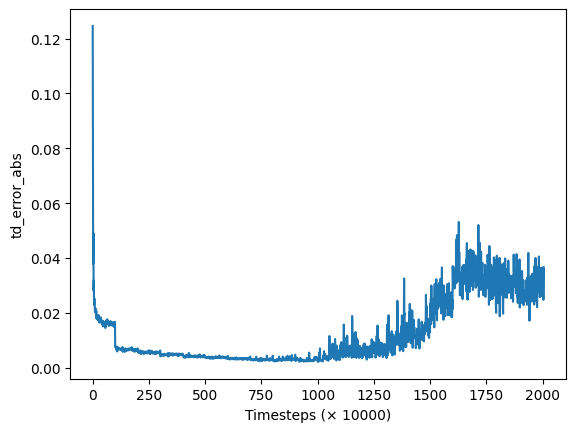

500.0 0
500.0 0


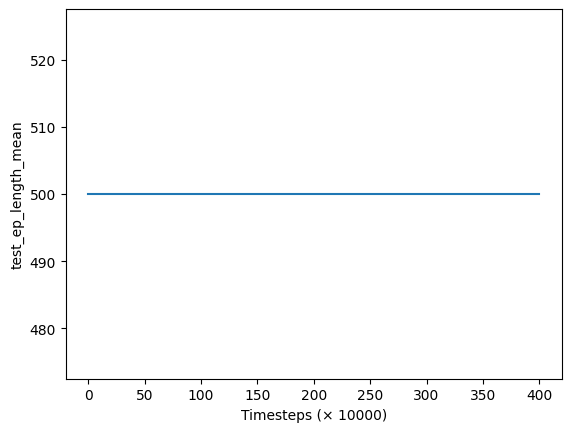

3.13 400
0.0 2


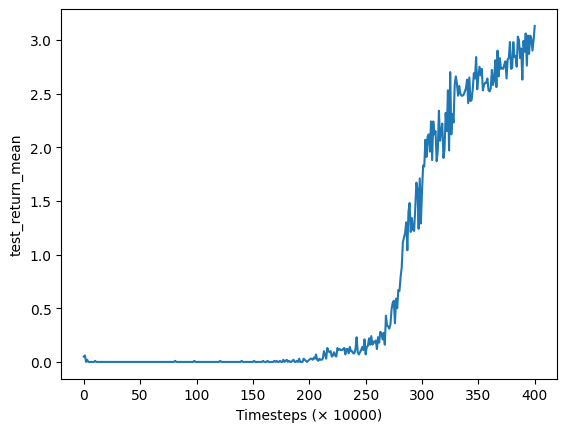

1.1568923891183658 396
0.0 2


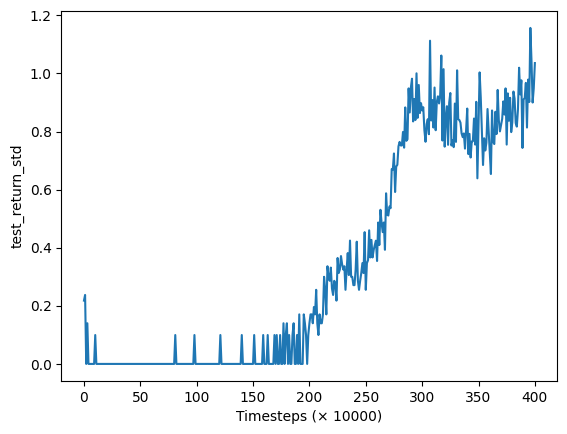

In [ ]:
import numpy as np

for k, v in d.items():
    if '_T' in k: continue
    if type(v[0]) == dict:
        v = [x['value'] for x in v]
    v = v[:-1]
    print(np.amax(v), np.argmax(v))
    print(np.amin(v), np.argmin(v))
    plt.plot(v)
    x = 100
    if len(v) > 600: 
        x //= 5
    plt.xlabel(f"Timesteps (× 10000)")
    plt.ylabel(k)
    plt.show()


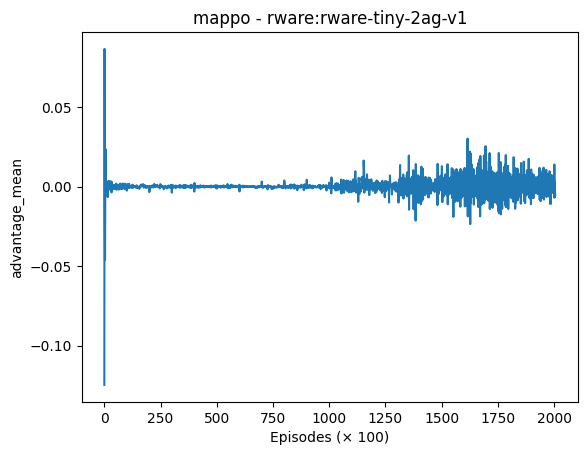

In [ ]:
adv = d['advantage_mean']
plt.plot(adv)
plt.title(' - '.join((alg, e)))
plt.xlabel("Episodes (× 100)")
plt.ylabel("advantage_mean")
plt.show()

-0.10258093476295471


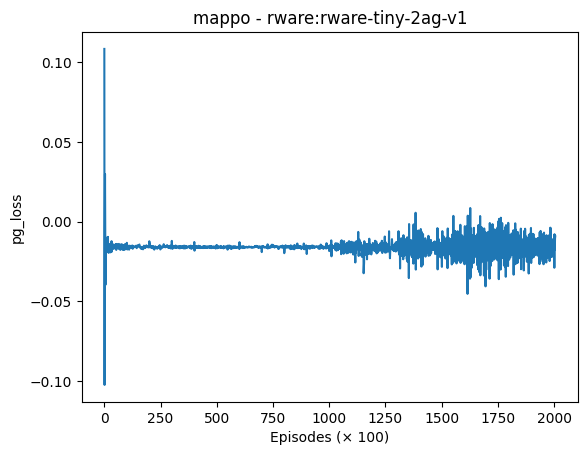

In [ ]:
pg = d['pg_loss']
print(min(pg))
plt.plot(pg)
plt.title(' - '.join((alg, e)))
plt.xlabel("Episodes (× 100)")
plt.ylabel("pg_loss")
plt.show()

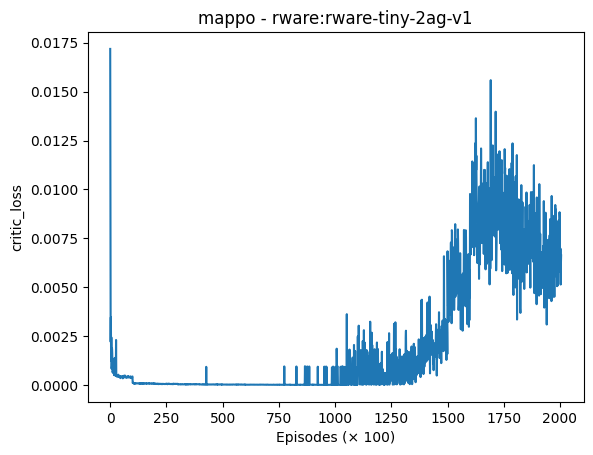

In [ ]:
cr = d['critic_loss']
plt.plot(cr)
plt.title(' - '.join((alg, e)))
plt.xlabel("Episodes (× 100)")
plt.ylabel("critic_loss")
plt.show()